In [10]:
import sys
import numpy as np
from siman import header
from siman.header      import db # database dictionary
from siman.calc_manage import smart_structure_read, add, res
from siman.geo         import supercell
from siman.database    import read_database, write_database
from siman.picture_functions import fit_and_plot
from siman.set_functions import read_vasp_sets
from siman.SSHTools      import SSHTools

read_database() # read saved results

header.PATH2POTENTIALS = 'potcars/' # path to POTCAR files
header.CLUSTERS['CEE']['address'] = 'aksenov@10.30.16.62' # your user account and IP of cluster
# or for windows
header.ssh_object = SSHTools()
header.ssh_object.setup(user="aksenov",host="10.30.16.62",pkey="/home/aksenov/.ssh/id_rsa")

In [9]:
st = smart_structure_read(input_geo_file = 'Li2/POSCAR') # read poscar
sc = supercell(st, [10,3,3]) # create 3x1x1 supercell, sizes close to 10 3 3 A; we need slab!

-- Calculating mul_matrix for ortho: [10, 3, 3] 

mul_matrix_float:
 [[2.91205591 0.         0.        ]
 [0.         0.87361677 0.        ]
 [0.         0.         0.87361677]] 
mul_matrix:
 [[3 0 0]
 [0 1 0]
 [0 0 1]] 
Old vectors (rprimd):
 [[3.4 0.  0. ]
 [0.  3.4 0. ]
 [0.  0.  3.4]] 
New vectors (rprimd) of supercell:
 [[10.3  0.   0. ]
 [ 0.   3.4  0. ]
 [ 0.   0.   3.4]] 
The supercell should contain 5.999999999999999 atoms ... 
  -- OK 




###  Create 100 surfaces with different vacuum thickness, run and read

In [3]:
thickness_list = [1,2,3,4,5,6,7,8,9,10]
add('Li311',    'opt', 1, up = 'up2', input_st = sc, it_folder = 'recitationCD/',     run = 0) 

for thickness in thickness_list:
    ''
    add('Li_suf_'+str(thickness), 'opt', 1, up = 'up2', input_st = sc.add_vacuum(0, thickness), it_folder = 'recitationCD/', run = 0)


-- Attention!, cluster None is not found, using default CEE 

-- check_kpoints(): Kpoint   mesh is:  [4, 10, 10] 

-- check_kpoints(): The actual k-spacings are  [0.15 0.18 0.18] 

-- POSCAR was written to /home/aksenov/Research/CEStorage/courses/Computational_Chemistry/2018/Rec10_DS/recitationCD///Li311.opt/1.POSCAR 

-- Attention! ngkpt =  [4, 10, 10]  is adopted from struct_des which you provided for it  Li311  and kspacing =  0.2 


Calculation ('Li311', 'opt', 1) successfully created

 

-- Attention!, cluster None is not found, using default CEE 

-- check_kpoints(): Kpoint   mesh is:  [3, 10, 10] 

-- check_kpoints(): The actual k-spacings are  [0.19 0.18 0.18] 

-- POSCAR was written to /home/aksenov/Research/CEStorage/courses/Computational_Chemistry/2018/Rec10_DS/recitationCD///Li_suf_1.opt/1.POSCAR 

-- Attention! ngkpt =  [3, 10, 10]  is adopted from struct_des which you provided for it  Li_suf_1  and kspacing =  0.2 


Calculation ('Li_suf_1', 'opt', 1) successfully created

In [12]:
res('Li311',    'opt', 1, up = 'up1')
for thickness in thickness_list:
    ''
    res('Li_suf_'+str(thickness), 'opt', 1, up = 'up1')



Max. F. tot  (meV/A) = 
[0]; 

-- name                          |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    
-- db['Li311.opt.1']             |  -11.3790  |10.30;3.43;3.43|   -184,175,175     |   1, 9,  9    


In [8]:
Li311 = db['Li311', 'opt', 1] 
A = np.linalg.norm( np.cross(Li311.end.rprimd[1] , Li311.end.rprimd[2]) ) # surface area

gamma_list = []
for thickness in thickness_list:
    Li_suf = db['Li_suf_'+str(thickness), 'opt', 1]

    gamma = (Li_suf.e0 - Li311.e0)/A * header.eV_A_to_J_m / 2
    gamma_list.append(gamma)
    print('Surface energy = {:3.3f} J/m2; vacuum thickness = {:2d} A'.format(gamma, thickness) )

Surface energy = 0.036 J/m2; vacuum thickness =  1 A
Surface energy = 0.122 J/m2; vacuum thickness =  2 A
Surface energy = 0.229 J/m2; vacuum thickness =  3 A
Surface energy = 0.429 J/m2; vacuum thickness =  4 A
Surface energy = 0.456 J/m2; vacuum thickness =  5 A
Surface energy = 0.460 J/m2; vacuum thickness =  6 A
Surface energy = 0.463 J/m2; vacuum thickness =  7 A
Surface energy = 0.462 J/m2; vacuum thickness =  8 A
Surface energy = 0.462 J/m2; vacuum thickness =  9 A
Surface energy = 0.462 J/m2; vacuum thickness = 10 A


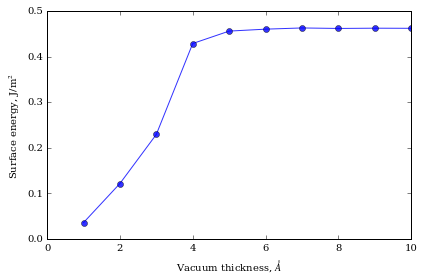

''

In [11]:
        
fit_and_plot(a = (thickness_list, gamma_list, '-o'), filename = None, ylabel = 'Surface energy, J/m$^2$', xlabel = 'Vacuum thickness, $\AA$')


### Optimize 100 surface

In [5]:
sc = supercell(st, [10,10,10]) # create 3x3x3 supercell, sizes close to 10 10 10 A; we need slab!
thickness = 5
read_vasp_sets([('opt_sym0', 'opt',{'ISYM':0})]) #create new set: optimization without symetry constraints
add('Li333_suf_'+str(thickness), 'opt_sym0', 1, up = 'up2', input_st = sc.add_vacuum(0, thickness), it_folder = 'recitationCD/', run = 0)


-- Calculating mul_matrix for ortho: [10, 10, 10] 

mul_matrix_float:
 [[2.91205591 0.         0.        ]
 [0.         2.91205591 0.        ]
 [0.         0.         2.91205591]] 
mul_matrix:
 [[3 0 0]
 [0 3 0]
 [0 0 3]] 
Old vectors (rprimd):
 [[3.4 0.  0. ]
 [0.  3.4 0. ]
 [0.  0.  3.4]] 
New vectors (rprimd) of supercell:
 [[10.3  0.   0. ]
 [ 0.  10.3  0. ]
 [ 0.   0.  10.3]] 
The supercell should contain 53.999999999999986 atoms ... 
  -- OK 

-- Attention!, cluster None is not found, using default CEE 

-- check_kpoints(): Kpoint   mesh is:  [3, 4, 4] 

-- check_kpoints(): The actual k-spacings are  [0.14 0.15 0.15] 

-- POSCAR was written to /home/aksenov/Research/CEStorage/courses/Computational_Chemistry/2018/Rec10_DS/recitationCD///Li333_suf_5.opt_sym0/1.POSCAR 

-- Attention! ngkpt =  [3, 4, 4]  is adopted from struct_des which you provided for it  Li333_suf_5  and kspacing =  0.2 


Calculation ('Li333_suf_5', 'opt_sym0', 1) successfully created

 



'Li333_suf_5'

In [6]:
res('Li333_suf_'+str(thickness), 'opt_sym0', 1, up = 'up2')



Max. F. tot  (meV/A) = 
[69 61 25 23 19 15 13 14 16 16 13 13 12 12 12  8]; 

-- name                          |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    
-- db['Li333_suf_5.opt_sym0.1']  |  -96.3091  |15.30;10.30;10.30|  -103,-646,-646    |  16, 4, 69    


(["db['Li333_suf_5.opt_sym0.1']  |  -96.3091  |15.30;10.30;10.30|  -103,-646,-646    |  16, 4, 69   "],
 [])

In [7]:
write_database()


Database has been successfully updated



In [8]:
db['Li333_suf_5.opt_sym0.1'].jmol()

-- POSCAR was written to /home/aksenov/Research/CEStorage/courses/Computational_Chemistry/2018/Rec10_DS/xyz/POSCAR_Li333_suf_5_opt_sym0_1_end 

